In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import numpy as np
import figs
%matplotlib inline
DATA_DIR = path.join('..', 'data')
figs.set_rc()

In [2]:
RESULT_HEADER = ['Init_station','Init_time', 'Tick_length','Init_count',
                 'Travel_period','Multiplier','Count_type']
# INDEX = ['Init_station','Init_time','Init_count','Count_type']
results = pd.DataFrame(np.load('travel_periods2.npy'))
timesteps = len(results.columns) - len(RESULT_HEADER)
results.columns = RESULT_HEADER + list(range(timesteps))
# results.drop(columns=['Travel_period', 'Tick_length'], inplace=True)
results.replace({'Count_type': {0.0: 'S', 1.0: 'I', 2.0: 'R', 3.0: 'N'}}, inplace=True)
results.set_index(RESULT_HEADER, inplace=True)

In [3]:
I_cols = results.xs('I', level='Count_type').T
R_cols = results.xs('R', level='Count_type').T

/mnt/c/Users/Josh/Google Drive_old/Uni/Part III/project/data/env/lib/python3.4/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


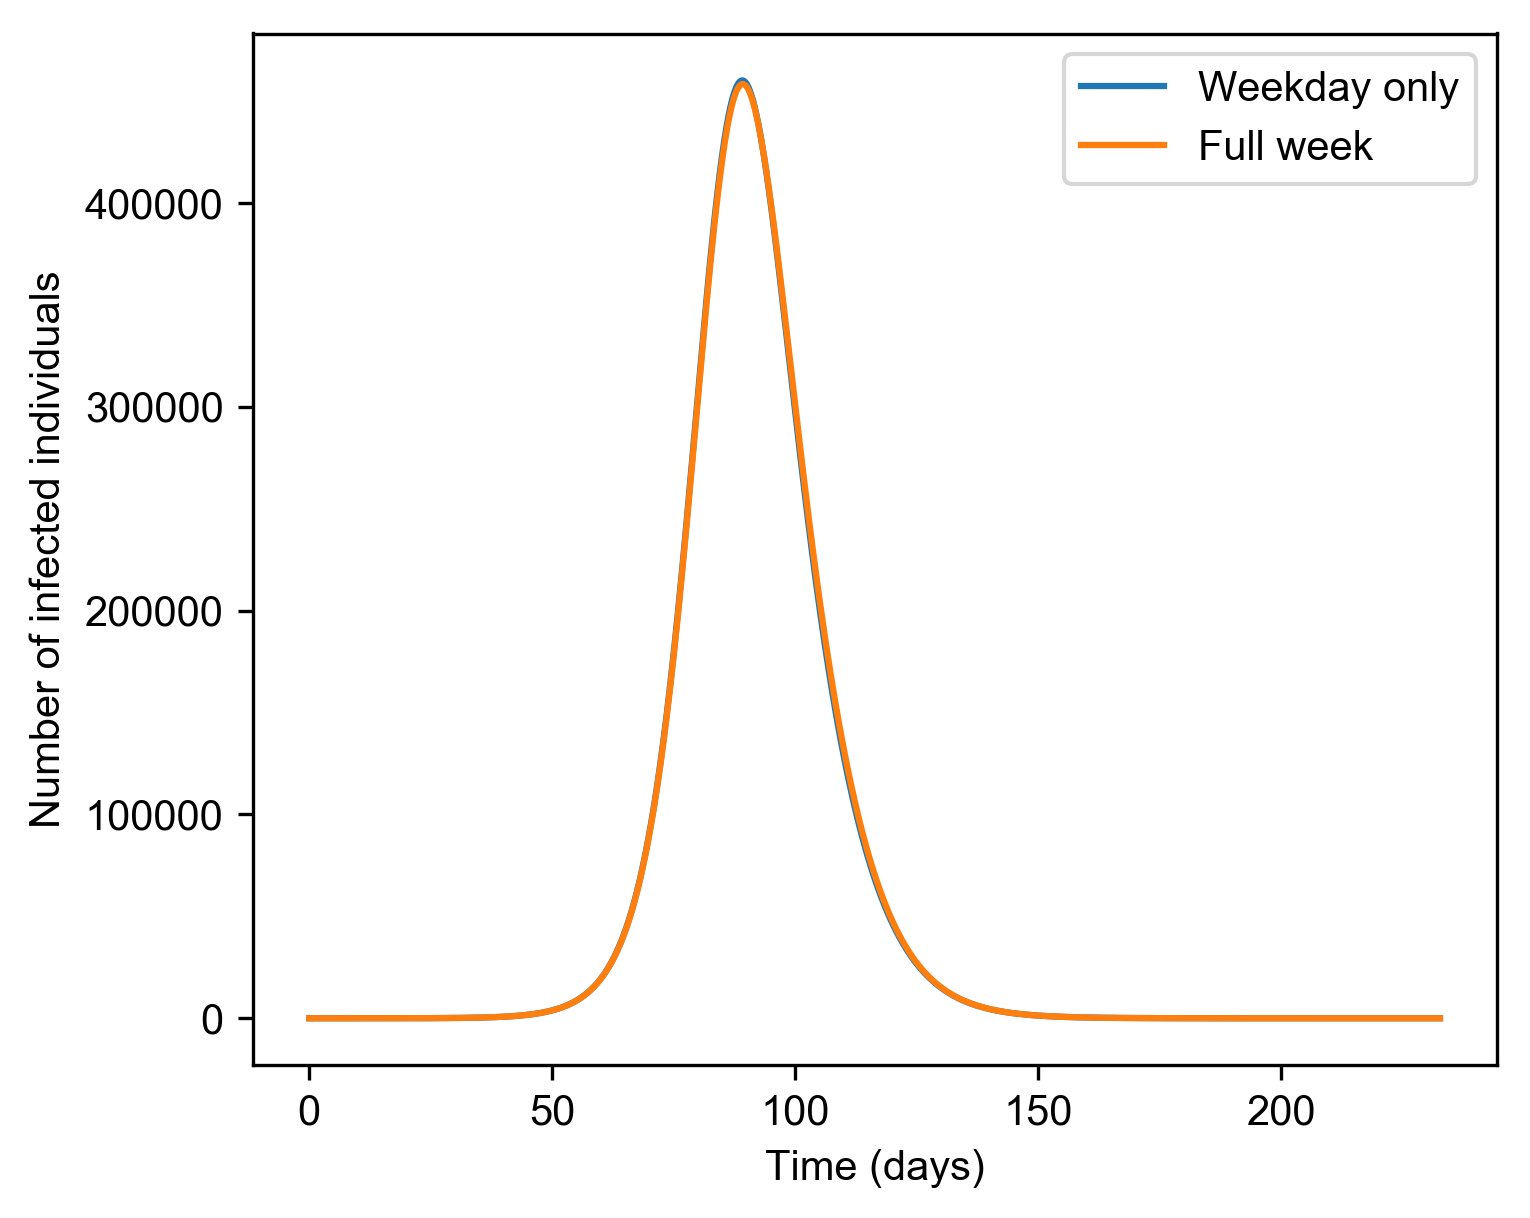

In [5]:
I_by_period = I_cols.T.groupby('Travel_period').mean()
I_by_period.columns = [col / 24 for col in I_by_period.columns]
I_by_period.index = pd.Index(('Weekday only', 'Full week'))
figs.set_rc()
figs.set_size(5.2, 0.8)
ax = I_by_period.T.plot()
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of infected individuals')
ax.legend(title='')
plt.savefig('../../figs/Fig4.tif')